# UAS KECERDASAN BUATAN_PREDIKSI DIABETES MENGGUNAKAN ANN

NAMA : JUMHADI

NIM   : 09011281823038

KELAS : SK5B

Data diebetes.csv di ambil dari halaman https://github.com/KartikayThakkar/Pima-Indians-Diabetes-ANN

Diabetes adalah penyakit kronis atau yang berlangsung jangka panjang yang ditandai dengan meningkatnya kadar gula darah (glukosa) hingga di atas nilai normal.Jika tidak dikelola dengan baik, diabetes dapat menyebabkan terjadinya berbagai komplikasi, seperti penyakit jantung koroner, stroke, obesitas, serta gangguan pada mata, ginjal, dan saraf.

<img src="a4.jpg"/>

Data penderita diabetes bertambah dari tahun ketahun.  Tingkat diagnosis diabetes memberikan kontribusi yang signifikan terhadap komorbiditas dan tingkat komplikasi diabetes.  Berdasarkan data histori penderita diabetes dapat dibuat rekomendasi prediksi penyakit diabetes yang membantu tenaga kesehatan.  Klasifikasi merupakan salah satu teknik dari data mining yang dapat digunakan untuk membuat prediksi.

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('diabetes.csv')

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

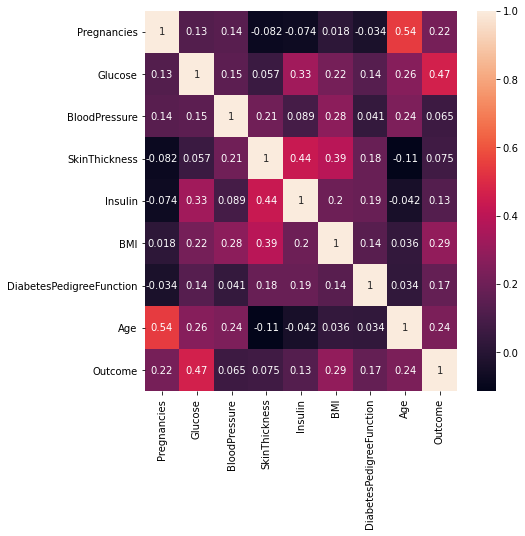

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

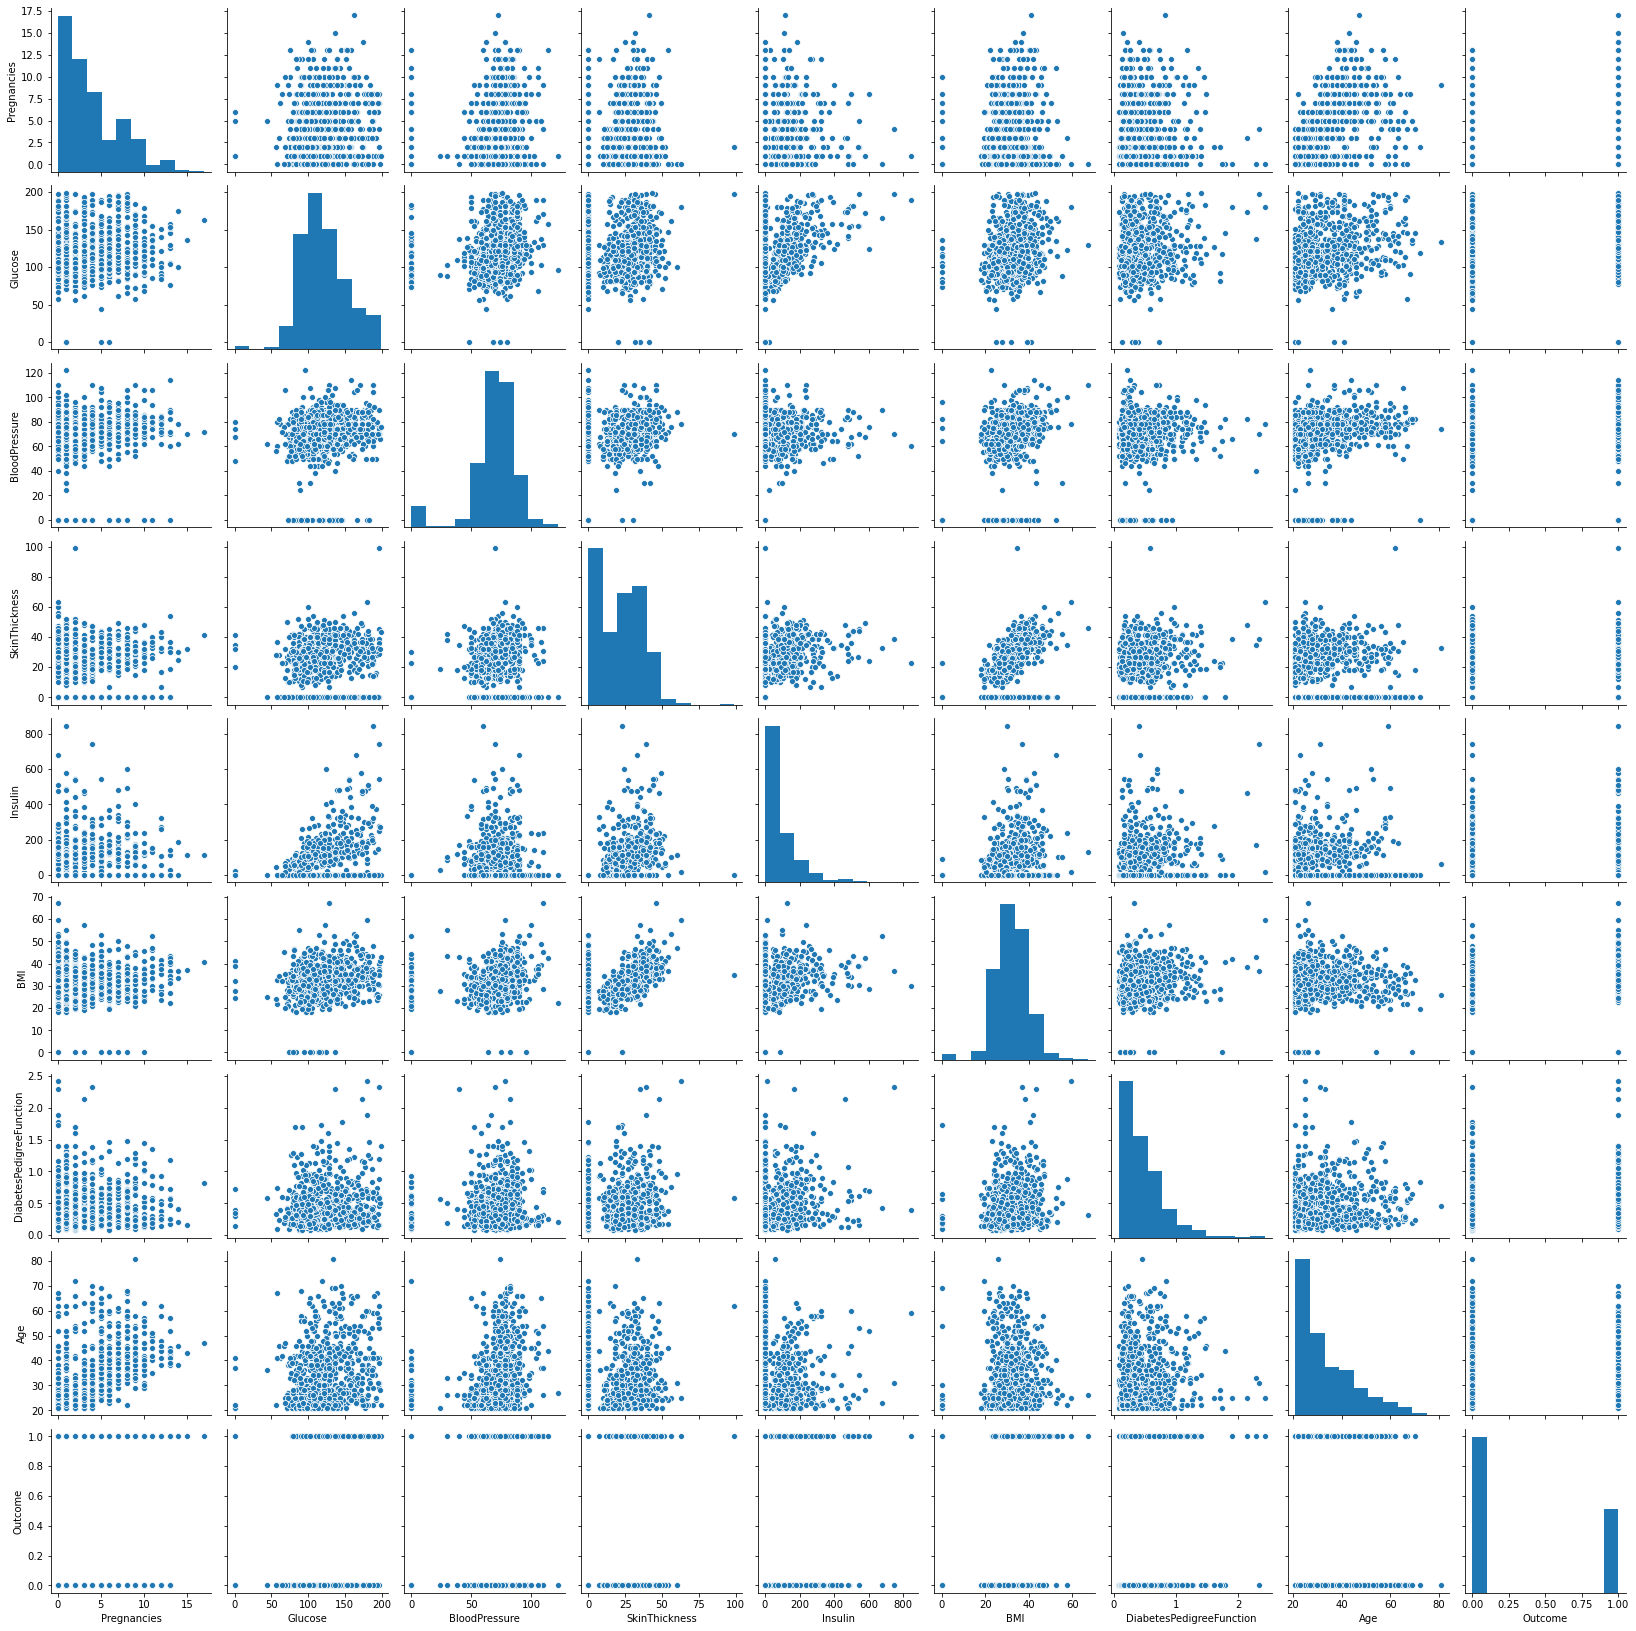

In [12]:
sns.pairplot(df)

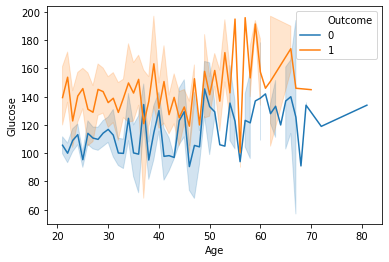

In [13]:
sns.lineplot(x='Age',y='Glucose',hue='Outcome',data=df)

# Dari GRAFIK di atas sangat  jelas bahwa orang dengan kadar glukosa atau kadar gula tinggi lebih mungkin menderita diabetes

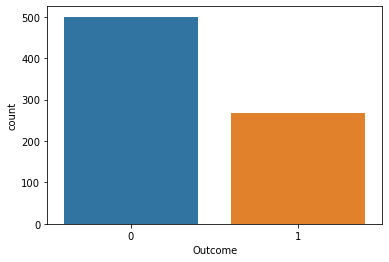

In [14]:
sns.countplot(x='Outcome',data=df)

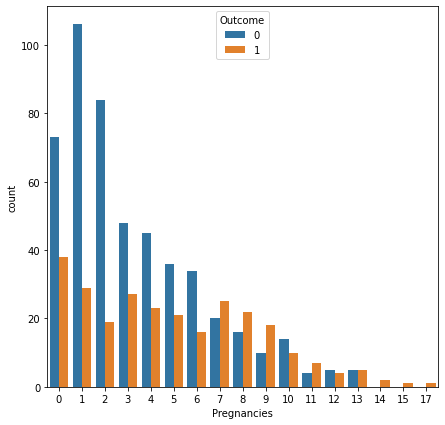

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x='Pregnancies',hue='Outcome',data=df)


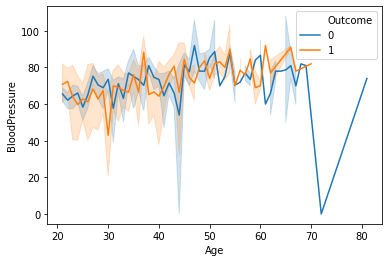

In [14]:
sns.lineplot(x='Age',y='BloodPressure',hue='Outcome',data=df)

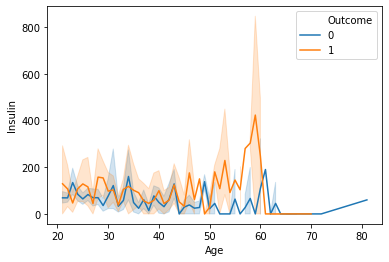

In [26]:
sns.lineplot(x='Age',y='Insulin',hue='Outcome',data=df)

# ANN

Artificial Neural Network (Jaringan Syaraf Tiruan) ANN adalah sistem komputasi dimana arsitektur dan operasi diilhami dari pengetahuan tentang sel syaraf biologi di dalam otak. Artificial Neural Network (Jaringan Syaraf Tiruan)  merupakan model yang meniru cara kerja jaringan neural biologis.
<img src="a3.png"/>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values


# Training Data

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
import tensorflow as tf
ann = tf.keras.Sequential()

In [134]:
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [135]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Proses Learning

In [136]:
ann.fit(X_train,y_train,batch_size=12,epochs=100)

Epoch 1/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5749
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.6922
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.7459
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7590
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7638
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7671
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7818
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7752
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7801
Epoch 10/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7769
Epoch 11/

In [142]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.75)

# Prediksi hasil learning 

Jika 0 = Negatif
jika 1 = positif

In [143]:
for i in range(len(y_pred)):
    print("Predicted %d------> Expected %d" %(y_pred[[i]],y_test[i]))

Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 1------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 1------> Expected 1
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 1------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 1------> Expected 0
Predicted 

In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
acc = accuracy_score(y_pred,y_test)

In [145]:
cm

array([[95, 23],
       [13, 23]])

Confusion Matrix digunakan untuk mengukur performa dalam permasalahan klasifikasi biner maupun permasalahan klasifikasi multiclass , pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.

In [146]:
acc

0.7662337662337663

Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar. Maka, accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data. Dengan kata lain, accuracy merupakan tingkat kedekatan nilai prediksi dengan nilai aktual (sebenarnya).Maka dapat dilihat ANN pada kasus prediksi diabetes mempunyai tingkat accuracy ACC yaitu 0.77 %